# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/protimatarafdar/Desktop/British_Airways_DS_Project/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
#df = df.drop('route', axis = 1)

In [8]:
#df = df.drop('booking_origin', axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Select the columns you want to label encode
columns_to_encode = ['sales_channel', 'trip_type', 'route', 'booking_origin']

# Loop through selected columns and apply label encoding
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Now the selected columns have been label encoded


In [10]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


In [11]:
df["sales_channel"].unique()

array([0, 1])

In [12]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,1.987620,84.940480,23.04456,9.06634,3.814420,391.905800,38.263340,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.129873,90.451378,33.88767,5.41266,1.992792,227.297259,32.756539,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.00000,5.00000,2.000000,203.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,51.000000,17.00000,9.00000,4.000000,381.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,115.000000,28.00000,13.00000,5.000000,611.000000,57.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,7.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
df.shape

(50000, 14)

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

# Split data into training and temporary sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify = y)


In [17]:
X_train.shape
X_test.shape

(15000, 13)

In [18]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.002457,0.002261,0.212606,-0.115850,0.015607,0.015407,-0.048508,0.052341,0.120404,0.028544,0.022943,-0.063169,0.024116
sales_channel,-0.002457,1.000000,0.021237,-0.013399,-0.060352,0.022375,0.042095,-0.020717,0.026449,-0.054254,0.032943,-0.022235,-0.038629,-0.041060
trip_type,0.002261,0.021237,1.000000,-0.008443,0.006510,-0.002758,-0.001381,-0.008754,0.002355,-0.014078,0.005668,0.011955,-0.039071,0.027021
purchase_lead,0.212606,-0.013399,-0.008443,1.000000,-0.076560,0.035973,0.036531,-0.107435,0.048180,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.060352,0.006510,-0.076560,1.000000,-0.024872,-0.000310,0.003427,-0.110355,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.022375,-0.002758,0.035973,-0.024872,1.000000,0.024086,-0.016735,0.042426,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.042095,-0.001381,0.036531,-0.000310,0.024086,1.000000,-0.016883,-0.009054,-0.002503,0.005392,0.009281,0.018434,-0.006986
route,-0.048508,-0.020717,-0.008754,-0.107435,0.003427,-0.016735,-0.016883,1.000000,-0.067710,0.026334,0.016270,-0.011232,-0.137320,-0.008488
booking_origin,0.052341,0.026449,0.002355,0.048180,-0.110355,0.042426,-0.009054,-0.067710,1.000000,-0.028995,-0.050763,-0.084314,-0.230364,0.130804
wants_extra_baggage,0.120404,-0.054254,-0.014078,-0.022207,0.176757,-0.011434,-0.002503,0.026334,-0.028995,1.000000,0.207669,0.216470,0.057054,0.068139


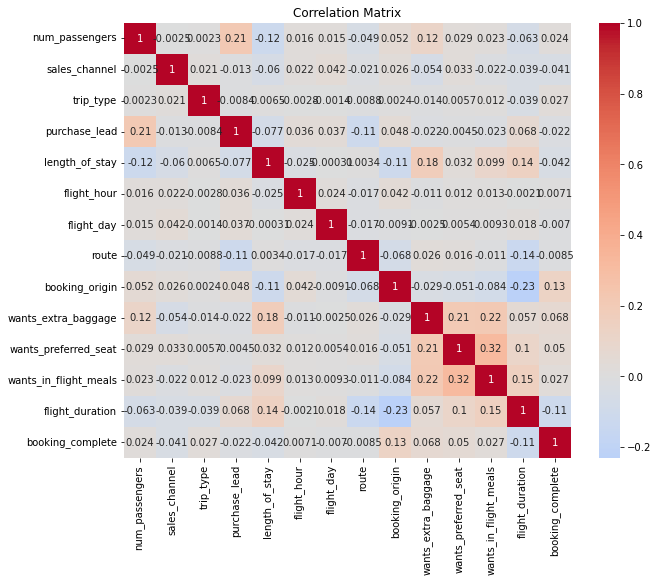

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Set title and show the plot
plt.title("Correlation Matrix")
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Create a RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions using the best estimator
predictions = best_estimator.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Best Random Forest Classifier - Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Classifier - Accuracy: 0.8538
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     12757
           1       0.56      0.10      0.17      2243

    accuracy                           0.85     15000
   macro avg       0.71      0.54      0.55     15000
weighted avg       0.82      0.85      0.81     15000



purchase_lead: 0.1913
route: 0.1508
flight_hour: 0.1407
length_of_stay: 0.1273
booking_origin: 0.1085
flight_day: 0.0912
flight_duration: 0.0721
num_passengers: 0.0502
wants_in_flight_meals: 0.0219
wants_preferred_seat: 0.0170
wants_extra_baggage: 0.0158
sales_channel: 0.0116
trip_type: 0.0017


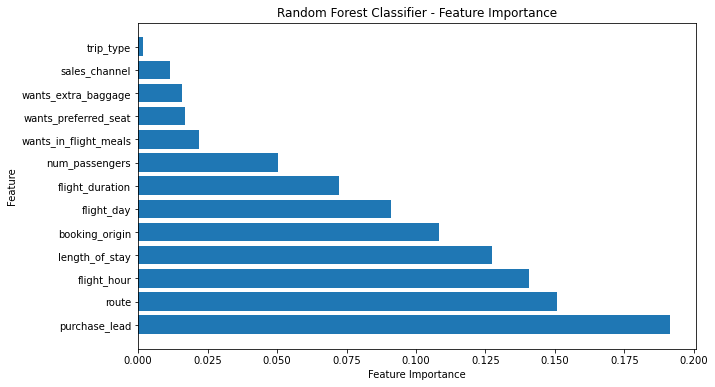

In [25]:
# Get feature importances from the best estimator
feature_importances = best_estimator.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a sorted list of feature importance values and their corresponding names
sorted_feature_importances = sorted(zip(feature_importances, feature_names), reverse=True)

# Print or visualize the feature importances
for importance, feature in sorted_feature_importances:
    print(f"{feature}: {importance:.4f}")

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh([feature for _, feature in sorted_feature_importances], 
         [importance for importance, _ in sorted_feature_importances])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()


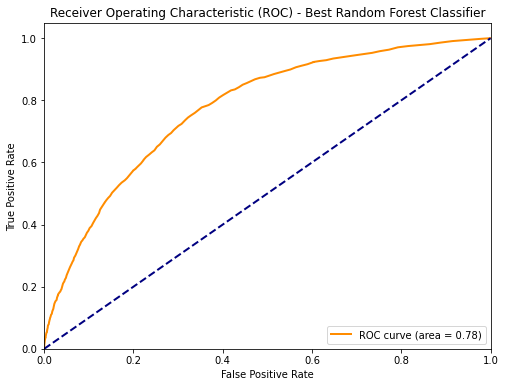

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class from the best estimator
y_proba_best = best_estimator.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for the best estimator
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

# Plot ROC curve for the best estimator
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Best Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


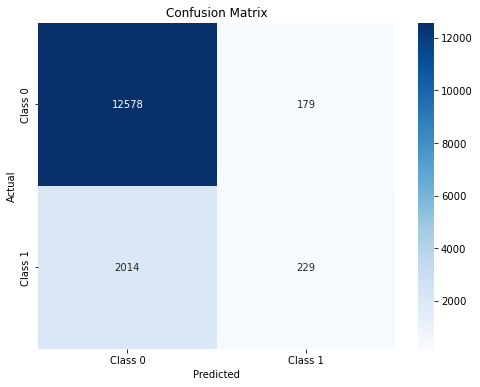

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


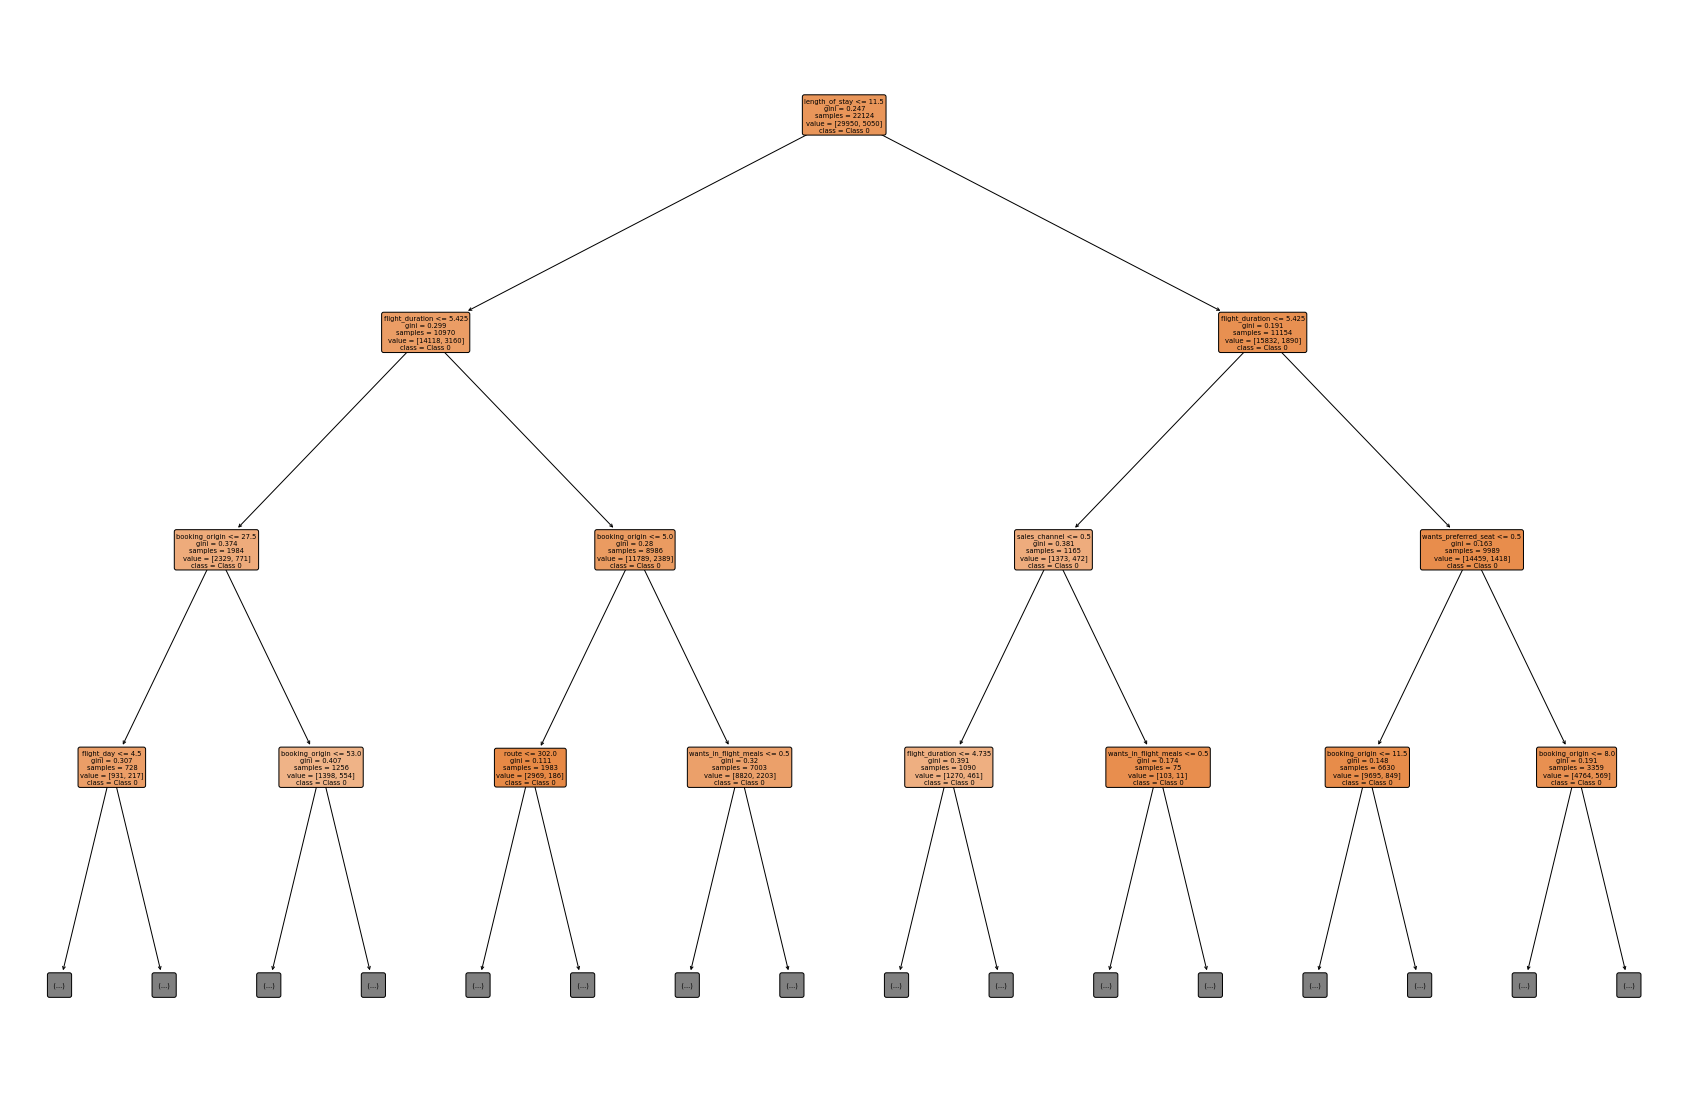

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get an individual tree from the trained RandomForestClassifier
individual_tree = best_estimator.estimators_[0]  # Change the index as needed

# Plot the individual decision tree
plt.figure(figsize=(30, 20))
plot_tree(individual_tree, max_depth = 3, feature_names=X_train.columns, class_names=["Class 0", "Class 1"],
          filled=True, rounded=True)
plt.show()
